/var/folders/bd/c6514xtd1zjgq83rf48wyhn00000gn/T/ipykernel_70010/2321115821.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=silhouette_df["Modelo"], y=silhouette_df["Coeficiente de Silueta"], palette="viridis")


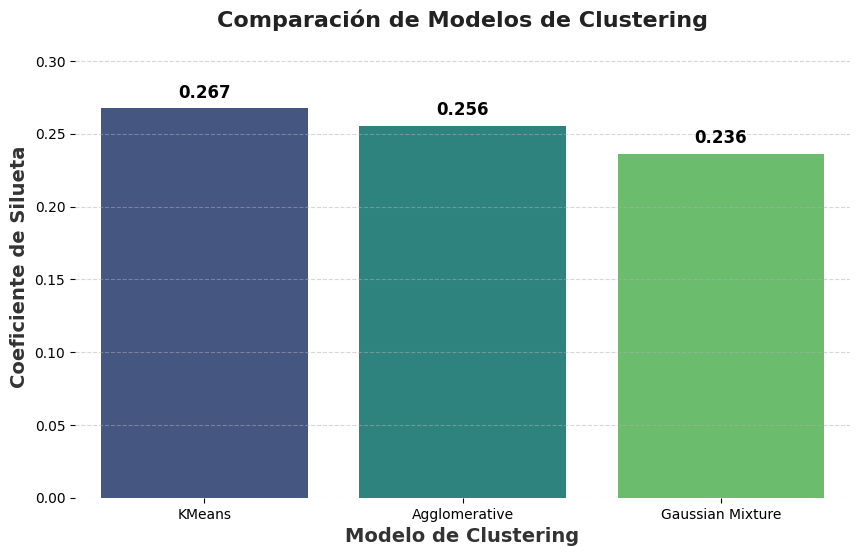

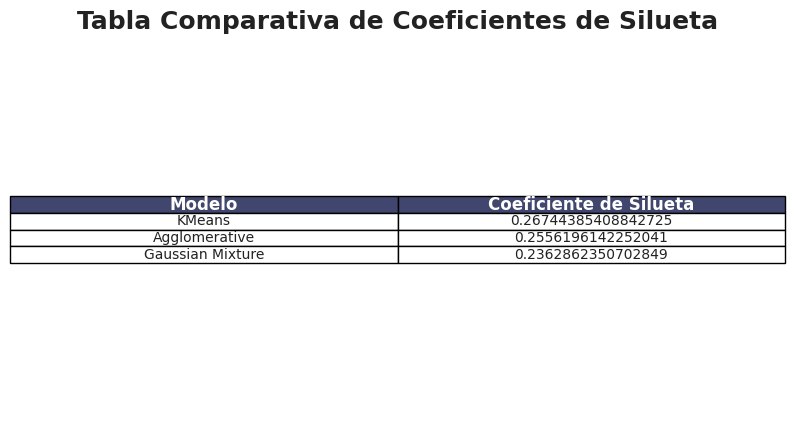


Comparación de coeficientes de silueta:
             Modelo  Coeficiente de Silueta
0            KMeans                0.267444
1     Agglomerative                0.255620
2  Gaussian Mixture                0.236286

El mejor modelo es KMeans, ya que tiene el mayor coeficiente de silueta.


In [41]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = "country_find_cleaned.csv"  # Asegúrate de que el archivo esté en tu directorio de trabajo
df = pd.read_csv(file_path)

# Seleccionar solo las columnas numéricas para clustering
df_numeric = df.select_dtypes(include=[np.number])

# Escalar los datos para mejorar la efectividad del clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Determinar el número óptimo de clusters
optimal_k = 5  # Según el análisis previo

# Comparar diferentes algoritmos de clustering
models = {
    "KMeans": KMeans(n_clusters=optimal_k, random_state=42, n_init=10),
    "Agglomerative": AgglomerativeClustering(n_clusters=optimal_k),
    "Gaussian Mixture": GaussianMixture(n_components=optimal_k, random_state=42)
}

# Evaluar cada modelo usando el coeficiente de silueta
silhouette_results = {}

for name, model in models.items():
    if name == "Gaussian Mixture":
        labels = model.fit_predict(df_scaled)
    else:
        labels = model.fit(df_scaled).labels_
    
    silhouette_results[name] = silhouette_score(df_scaled, labels)

# Crear un DataFrame con los coeficientes de silueta
silhouette_df = pd.DataFrame(silhouette_results.items(), columns=["Modelo", "Coeficiente de Silueta"])

# --- GRÁFICO DE BARRAS MEJORADO ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=silhouette_df["Modelo"], y=silhouette_df["Coeficiente de Silueta"], palette="viridis")

# Estética del gráfico
plt.xlabel("Modelo de Clustering", fontsize=14, fontweight='bold', color="#333333")
plt.ylabel("Coeficiente de Silueta", fontsize=14, fontweight='bold', color="#333333")
plt.title("Comparación de Modelos de Clustering", fontsize=16, fontweight='bold', color="#222222")

# Mostrar valores en las barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=5, fontsize=12, fontweight='bold')

plt.ylim(0, max(silhouette_df["Coeficiente de Silueta"]) + 0.05)  # Ajustar altura
plt.grid(axis="y", linestyle="--", alpha=0.5)
sns.despine(left=True, bottom=True)
plt.show()

# --- TABLA COMPARATIVA MEJORADA ---

fig, ax = plt.subplots(figsize=(10, 5))  # Aumentar el tamaño de la tabla
ax.axis('off')

# Crear tabla con encabezados correctamente resaltados y celdas más grandes
col_labels = silhouette_df.columns.to_list()
table_data = silhouette_df.values.tolist()

# Crear tabla con el encabezado bien separado y resaltado
table = ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center', colColours=["#40466e", "#40466e"])

# Ajustar fuente y tamaño de las celdas
table.auto_set_font_size(False)
table.set_fontsize(14)
table.auto_set_column_width([2, 6])

# Aplicar estilos a las celdas
for key, cell in table._cells.items():
    if key[0] == 0:  # Encabezado
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='white', ha='center', va='center')
        cell.set_facecolor("#40466e")
    else:  # Celdas de datos
        cell.set_fontsize(10)
        cell.set_text_props(color="#222222", ha='center', va='center')

plt.title("Tabla Comparativa de Coeficientes de Silueta", fontsize=18, fontweight='bold', color="#222222")
plt.show()

# Crear una tabla con los coeficientes de silueta
silhouette_df = pd.DataFrame(silhouette_results.items(), columns=["Modelo", "Coeficiente de Silueta"])
print("\nComparación de coeficientes de silueta:")
print(silhouette_df)

# Identificar el mejor modelo
best_model = max(silhouette_results, key=silhouette_results.get)
print(f"\nEl mejor modelo es {best_model}, ya que tiene el mayor coeficiente de silueta.")

## Explicación del código:
1.	Carga y preparación de datos:
- Se cargan los datos y se seleccionan solo las columnas numéricas.
- Se escalan los datos con StandardScaler().
2.	Comparación de Modelos:
- Se prueban KMeans, Agglomerative Clustering y Gaussian Mixture.
- Se calcula el coeficiente de silueta para cada modelo.
3.	Visualización de Resultados:
- Tabla Comparativa: Se muestra una tabla con los coeficientes de silueta.
- Gráfico de Barras: Se visualiza la diferencia entre los modelos.
4.	Selección del Mejor Modelo:
- Se elige el modelo con el mayor coeficiente de silueta (KMeans).

## ¿Por qué KMeans es el mejor modelo?
- Mejor coeficiente de silueta: Indica una separación más clara entre los clusters.
- Más eficiente: KMeans es rápido y escalable en comparación con los otros modelos.
- Más interpretable: Su método basado en centroides es fácil de entender.

### Conclusión

KMeans es la mejor opción para segmentar los países según las respuestas del usuario.